<a href="https://colab.research.google.com/github/sunghyouk/study_room/blob/master/self_ML_DL_study_text/ch9_3_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


길면 자르고 모자라면 채우기

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6921 - accuracy: 0.5559 - val_loss: 0.6911 - val_accuracy: 0.6014
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6892 - accuracy: 0.6211 - val_loss: 0.6873 - val_accuracy: 0.6310
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6836 - accuracy: 0.6433 - val_loss: 0.6800 - val_accuracy: 0.6484
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6718 - accuracy: 0.6647 - val_loss: 0.6641 - val_accuracy: 0.6554
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6405 - accuracy: 0.6770 - val_loss: 0.6160 - val_accuracy: 0.6888
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5781 - accuracy: 0.7241 - val_loss: 0.5572 - val_accuracy: 0.7446
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5355 - accuracy: 0.7518 - val_loss: 0.5321 - val_ac

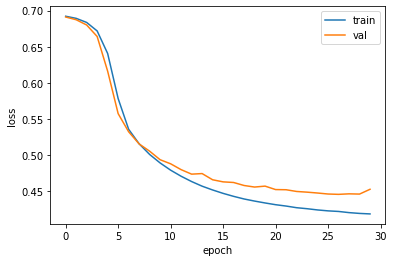

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 순환층에 드롭아웃 적용하기

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 46ms/step - loss: 0.6924 - accuracy: 0.5325 - val_loss: 0.6917 - val_accuracy: 0.5600
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6899 - accuracy: 0.5993 - val_loss: 0.6879 - val_accuracy: 0.6352
Epoch 3/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6827 - accuracy: 0.6584 - val_loss: 0.6753 - val_accuracy: 0.6806
Epoch 4/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6462 - accuracy: 0.6932 - val_loss: 0.6073 - val_accuracy: 0.7120
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5866 - accuracy: 0.7214 - val_loss: 0.5715 - val_accuracy: 0.7322
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5632 - accuracy: 0.7337 - val_loss: 0.5522 - val_accuracy: 0.7456
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5438 - accuracy: 0.7490 - val_loss: 0.5358 - val_ac

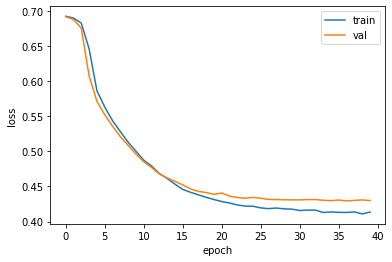

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 2개의 층을 연결하기

In [11]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 31s 84ms/step - loss: 0.6928 - accuracy: 0.5275 - val_loss: 0.6925 - val_accuracy: 0.5128
Epoch 2/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6909 - accuracy: 0.5491 - val_loss: 0.6892 - val_accuracy: 0.5714
Epoch 3/100
313/313 [==============================] - 26s 83ms/step - loss: 0.6807 - accuracy: 0.5984 - val_loss: 0.6686 - val_accuracy: 0.5764
Epoch 4/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6226 - accuracy: 0.6762 - val_loss: 0.5853 - val_accuracy: 0.7194
Epoch 5/100
313/313 [==============================] - 25s 80ms/step - loss: 0.5615 - accuracy: 0.7295 - val_loss: 0.5403 - val_accuracy: 0.7414
Epoch 6/100
313/313 [==============================] - 25s 81ms/step - loss: 0.5274 - accuracy: 0.7477 - val_loss: 0.5092 - val_accuracy: 0.7576
Epoch 7/100
313/313 [==============================] - 25s 81ms/step - loss: 0.5049 - accuracy: 0.7605 - val_loss: 0.4882 - val_ac

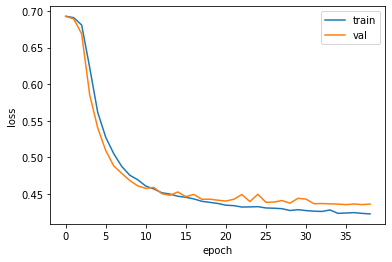

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### GRU 신경망 훈련하기

In [15]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 47ms/step - loss: 0.6924 - accuracy: 0.5225 - val_loss: 0.6919 - val_accuracy: 0.5376
Epoch 2/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6903 - accuracy: 0.5645 - val_loss: 0.6893 - val_accuracy: 0.5602
Epoch 3/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6866 - accuracy: 0.5897 - val_loss: 0.6850 - val_accuracy: 0.5736
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6804 - accuracy: 0.6127 - val_loss: 0.6776 - val_accuracy: 0.6062
Epoch 5/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6695 - accuracy: 0.6328 - val_loss: 0.6646 - val_accuracy: 0.6266
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6503 - accuracy: 0.6561 - val_loss: 0.6411 - val_accuracy: 0.6562
Epoch 7/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6114 - accuracy: 0.6857 - val_loss: 0.5887 - val_ac

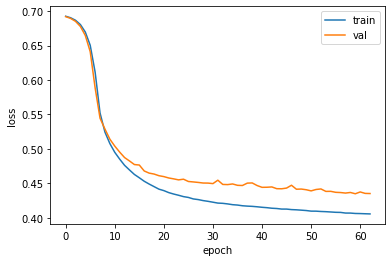

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 가장 좋았던 모델로 test set을 prediction

In [19]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 14ms/step - loss: 0.4308 - accuracy: 0.7983


[0.4307805001735687, 0.7982800006866455]